BÀI 3 LOGISTIC REGRESSION 

```
# --------
```
Phân loại dựa trên thuật toán hồi quy logic (Logistic Regression)



Bài 3a) Xây dựng mô hình Logistic Regression phân loại tuổi mua bảo hiểm (1 biến)

In [1]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [2]:
#link data 3a
link='https://drive.google.com/file/d/1fps2HyOTMZrCUK1e-36yPN13Tbr0OVlN/view?usp=sharing'

In [3]:
#Đọc data 
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path) #Dữ liệu gồm 2 cột: Tuổi/ Mua bảo hiểm (1 là mua, 0 là chưa mua)

In [4]:
#Xem thông tin cơ bản của dữ liệu
#df.head()
#df.info()
#df.describe()
df.tail()

,Age,Bought_Insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


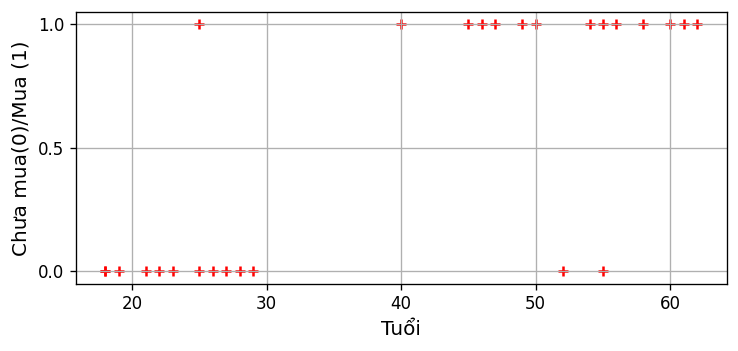

In [ ]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Tuổi',fontsize=12)
plt.ylabel('Chưa mua(0)/Mua (1)',fontsize=12)
plt.yticks([0.0,0.5, 1.0])
plt.grid()
plt.scatter(df.Age, df.Bought_Insurance, color='red', marker='+')

In [ ]:
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X=df[['Age']]
y=df.Bought_Insurance
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8)
#X_train, X_test, y_train, y_test = train_test_split(df[['Age']],df.Bought_Insurance,train_size=0.8) #Chia dữ liệu thành chuỗi train và test
#X_train
#X_test
#y_train
#y_test

In [ ]:
from sklearn.linear_model import LogisticRegression #Import mô hình LogisticRegression gán cho biến model
model = LogisticRegression()
model.fit(X_train, y_train) #Training model

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test) #Dự báo cho tập test
#in ra data y_pred và  y_test có thể thấy là dự đoán đúng 100%
#y_pred    # 1, 0, 0, 1, 0, 0
#y_test    # 1, 0, 0, 1, 0, 0

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 1])

In [ ]:
y_test

13    0
3     0
18    0
20    0
14    1
4     1
Name: Bought_Insurance, dtype: int64

In [ ]:
#Dự báo 1 tuổi bất kỳ xem đã mua bảo hiểm hay chưa? Ví dụ 20 tuổi
model.predict([[50]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.score(X_test,y_test) # Có thể dùng hàm model.score() để vừa dự báo và đánh giá mô hình (kết quả =1=100%)

0.8333333333333334

In [ ]:
#Có thể in ra các tham số của mô hình:
a=model.coef_       # 0.11380555
b=model.intercept_   # -4.3774503

In [ ]:
a

array([[0.14315795]])

In [ ]:
b

array([-5.22361788])

In [ ]:
#Có thể dự báo chi tiết hơn bằng giá trị xác suất
model.predict_proba(X_test) #Chúng ta nhìn vào cột thứ 2 giá trị dự báo lớn hơn 0.5 thì đc coi là có mua bảo hiểm và ngược lại. Nhưng ở bảng thông tin về xác xuất chúng ta biết rõ hơn là bao nhiêu phần trăm 

array([[0.74498418, 0.25501582],
       [0.0979162 , 0.9020838 ],
       [0.92439499, 0.07560501],
       [0.90179242, 0.09820758],
       [0.14293527, 0.85706473],
       [0.20397263, 0.79602737]])

Bài 3b) Xây dựng mô hình Logistic Regression phân loại cho vay (đa biến)

In [5]:
#link data 3b
link='https://drive.google.com/file/d/1IDYtkpK5GLOp4ANR4Ee5iT0tSgvZjxhq/view?usp=sharing'
#Nguồn data: https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv

In [6]:
#Đọc data 
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path) #Dữ liệu gồm 3 cột (20 dòng): Lương/ Thời gian làm việc/ Cho vay hay ko (1 là có, 0 là không)

In [ ]:
#Xem thông tin cơ bản của dữ liệu
df
#df.info()
#df.describe()

,Salary,Time_year,Loan
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [ ]:
data= df.values
X = data[:, 0:2]
y = data[:, 2]

In [ ]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

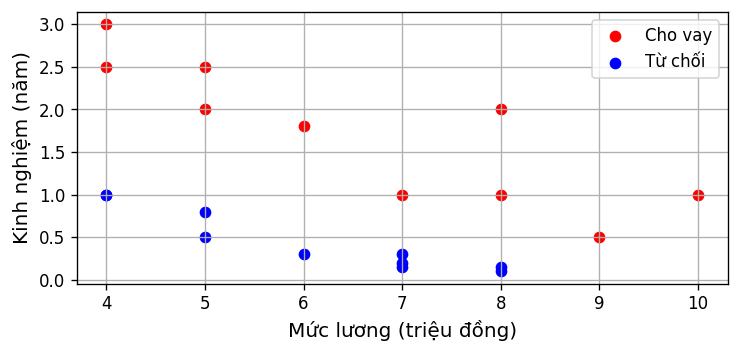

In [ ]:
#Vẽ hình thể hiện các biến
plt.xlabel('Mức lương (triệu đồng)',fontsize=12)
plt.ylabel('Kinh nghiệm (năm)',fontsize=12)
plt.grid()
plt.scatter(X[:10, 0], X[:10, 1], c='red', label='Cho vay') # Vẽ scatter giữa mức lương và kinh nghiệm của nhóm Cho vay
plt.scatter(X[10:, 0], X[10:, 1], c='blue', label='Từ chối') # Vẽ scatter giữa mức lương và kinh nghiệm của nhóm Từ chối cho vay
plt.legend()

In [ ]:
y=df['Loan']
df.drop('Loan',axis='columns',inplace=True)
X=df #X gồm 2 biến

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=1) #Chia dữ liệu thành chuỗi train và test

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
#Độ chính xác của mô hình
model.score(X_test,y_test)

0.9166666666666666

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 0],
       [1, 6]])

Text(0.5, 8.666666666666668, 'Dự báo')

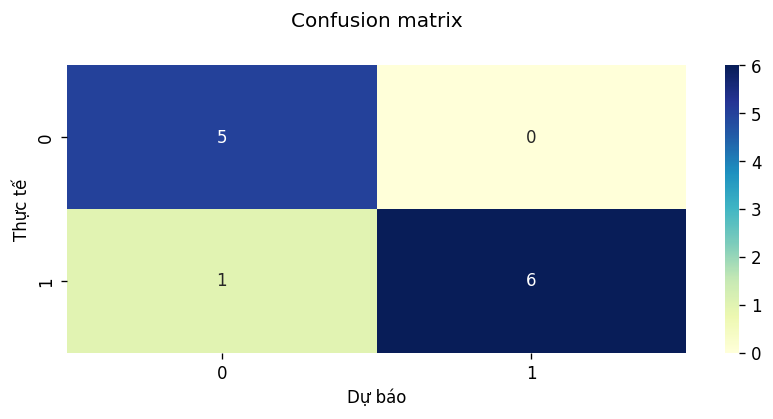

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')